In [1]:
# Import nedeed packages
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests

import tensorflow as tf

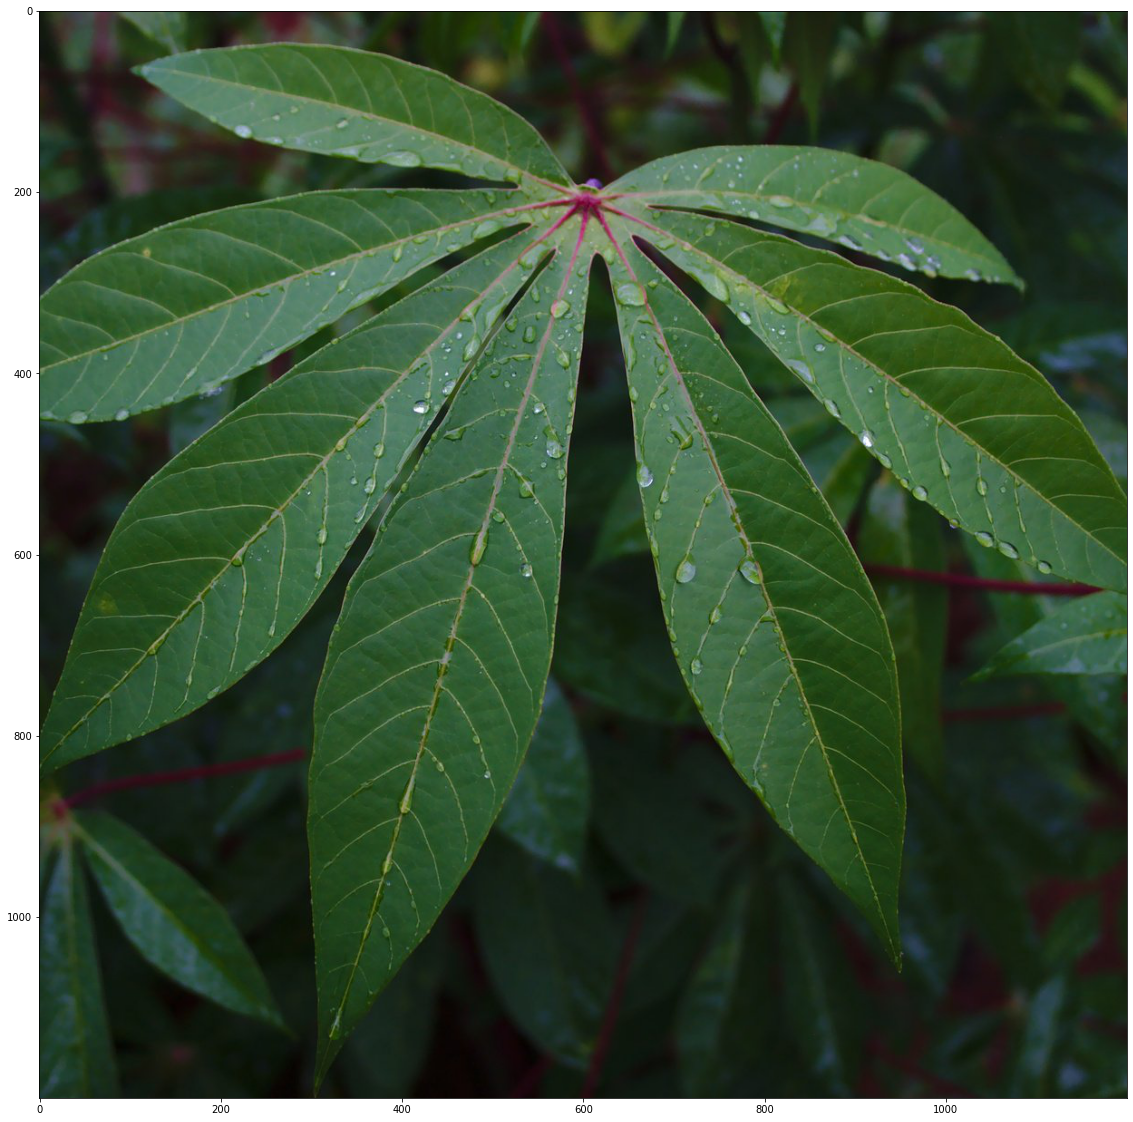

In [2]:
# get an image from an url
img = Image.open(requests.get('https://images.freeimages.com/images/large-previews/c14/cassava-leaf-1634171.jpg', stream=True).raw)
# plot it 

plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()



FLIPPING

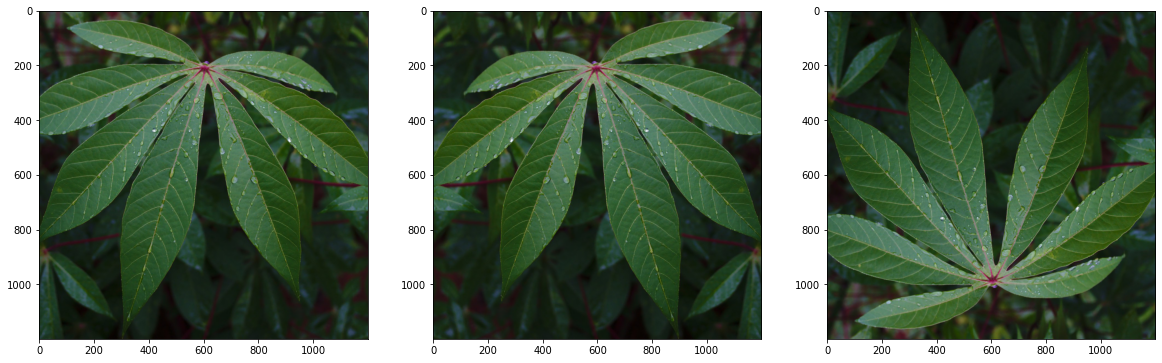

In [3]:
flip_lr_image = tf.image.stateless_random_flip_left_right(np.array(img), seed = (2, 3))
flip_ud_image = tf.image.stateless_random_flip_up_down(np.array(img), seed = (2, 3))
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(flip_lr_image)
plt.subplot(1, 3, 3)
plt.imshow(flip_ud_image)
plt.show()

RESIZING / CROPPING

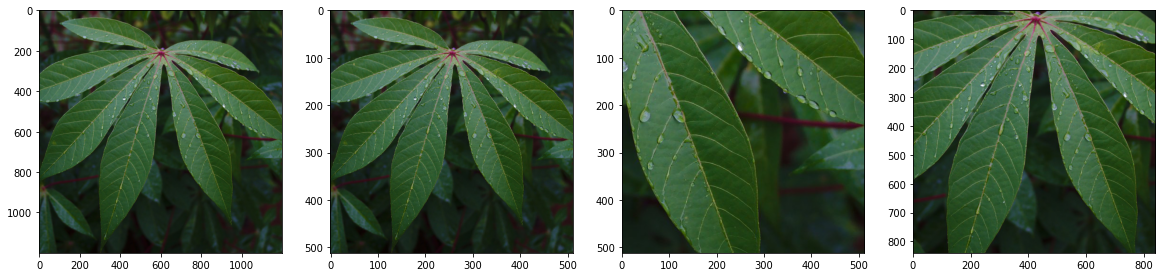

In [4]:
img = np.array(img)
resized = tf.image.resize(img, [512, 512] , method = 'nearest', preserve_aspect_ratio=True)
random_crop = tf.image.random_crop(img, size = [512, 512, 3])
central_crop = tf.image.central_crop(img, 0.7)
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(resized)
plt.subplot(1, 4, 3)
plt.imshow(random_crop)
plt.subplot(1, 4, 4)
plt.imshow(central_crop)


plt.show()

**BRIGHTNESS**

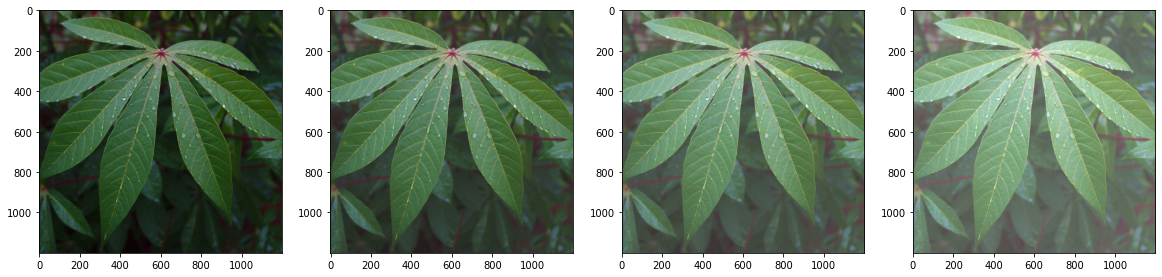

In [5]:

img_br1 = tf.image.adjust_brightness(img, 0.1)
img_br2 = tf.image.adjust_brightness(img, 0.2)
img_br3 = tf.image.adjust_brightness(img, 0.3)
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(img_br1)
plt.subplot(1, 4, 3)
plt.imshow(img_br2)
plt.subplot(1, 4, 4)
plt.imshow(img_br3)
plt.show()


**HUE**

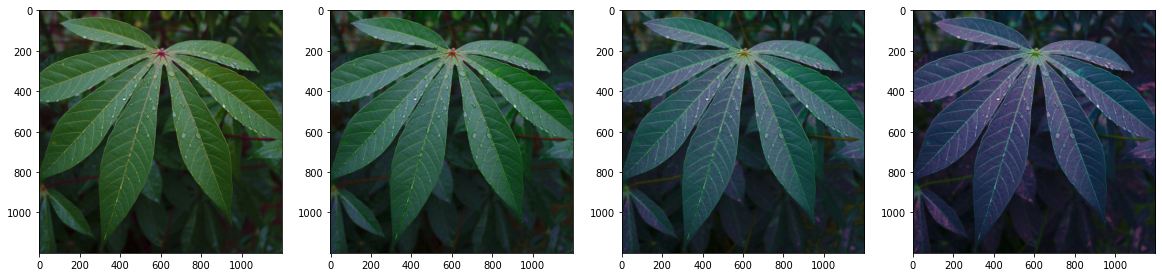

In [6]:
img_h1 = tf.image.adjust_hue(img, 0.1)
img_h2 = tf.image.adjust_hue(img, 0.2)
img_h3 = tf.image.adjust_hue(img, 0.3)
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(img_h1)
plt.subplot(1, 4, 3)
plt.imshow(img_h2)
plt.subplot(1, 4, 4)
plt.imshow(img_h3)
plt.show()

**CONTRAST**

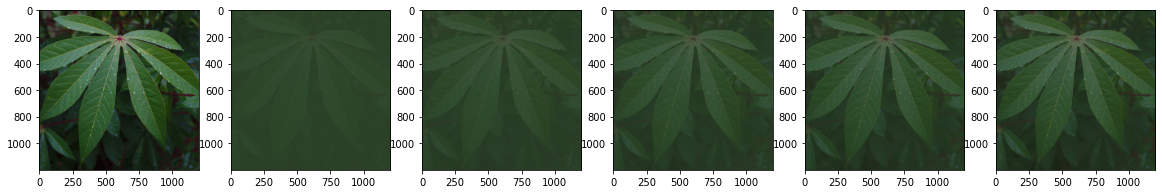

In [7]:
img_c1 = tf.image.adjust_contrast(img, 0.1)
img_c2 = tf.image.adjust_contrast(img, 0.2)
img_c3 = tf.image.adjust_contrast(img, 0.3)
img_c4 = tf.image.adjust_contrast(img, 0.4)
img_c5 = tf.image.adjust_contrast(img, 0.5)
plt.figure(figsize=(20, 20))
plt.subplot(1, 6, 1)
plt.imshow(img)
plt.subplot(1, 6, 2)
plt.imshow(img_c1)
plt.subplot(1, 6, 3)
plt.imshow(img_c2)
plt.subplot(1, 6, 4)
plt.imshow(img_c3)
plt.subplot(1, 6, 5)
plt.imshow(img_c4)
plt.subplot(1, 6, 6)
plt.imshow(img_c5)
plt.show()

**SATURATION**

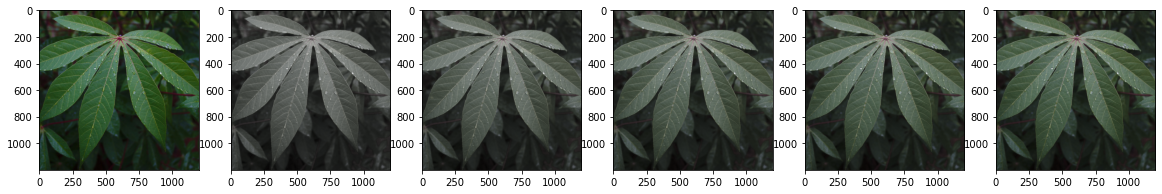

In [8]:
img_s1 = tf.image.adjust_saturation(img, 0.1)
img_s2 = tf.image.adjust_saturation(img, 0.2)
img_s3 = tf.image.adjust_saturation(img, 0.3)
img_s4 = tf.image.adjust_saturation(img, 0.4)
img_s5 = tf.image.adjust_saturation(img, 0.5)
plt.figure(figsize=(20, 20))
plt.subplot(1, 6, 1)
plt.imshow(img)
plt.subplot(1, 6, 2)
plt.imshow(img_s1)
plt.subplot(1, 6, 3)
plt.imshow(img_s2)
plt.subplot(1, 6, 4)
plt.imshow(img_s3)
plt.subplot(1, 6, 5)
plt.imshow(img_s4)
plt.subplot(1, 6, 6)
plt.imshow(img_s5)
plt.show()

**GAMMA**

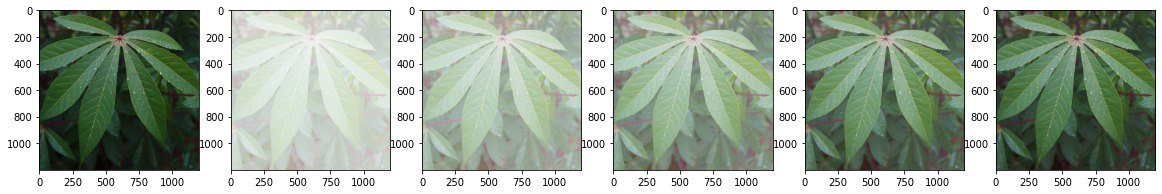

In [9]:
img_g1 = tf.image.adjust_gamma(img, 0.1)
img_g2 = tf.image.adjust_gamma(img, 0.2)
img_g3 = tf.image.adjust_gamma(img, 0.3)
img_g4 = tf.image.adjust_gamma(img, 0.5)
img_g5 = tf.image.adjust_gamma(img, 0.7)
plt.figure(figsize=(20, 20))
plt.subplot(1, 6, 1)
plt.imshow(img)
plt.subplot(1, 6, 2)
plt.imshow(img_g1)
plt.subplot(1, 6, 3)
plt.imshow(img_g2)
plt.subplot(1, 6, 4)
plt.imshow(img_g3)
plt.subplot(1, 6, 5)
plt.imshow(img_g4)
plt.subplot(1, 6, 6)
plt.imshow(img_g5)
plt.show()

These techniques can be used in a stochastic way, using tf.image.random_...or tf.image.stateless_random_ ... which guarantees the same results given the same seed.

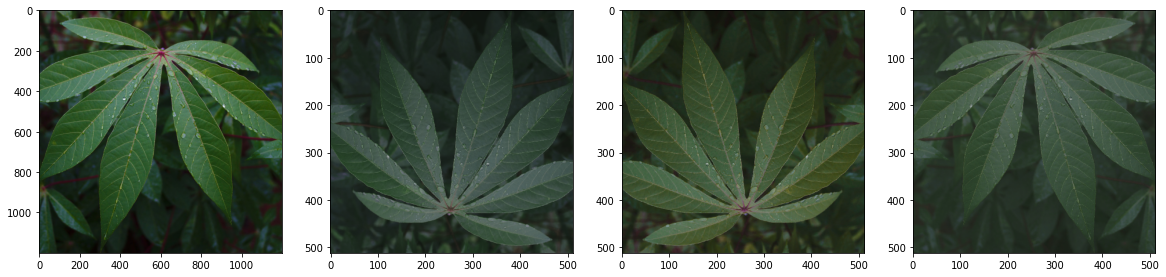

In [10]:
def augment(image):
  new_image = tf.image.random_jpeg_quality(image, 75, 95)
  new_image = tf.image.resize(new_image, [512, 512] , method = 'nearest', preserve_aspect_ratio=True)
  new_image = tf.image.random_flip_left_right(new_image)
  new_image = tf.image.random_flip_up_down(new_image)
  new_image = tf.image.random_brightness(new_image, 0.1)
  new_image = tf.image.random_contrast(new_image, 0.5, 0.7)
  new_image = tf.image.random_hue(new_image, 0.1)
  new_image = tf.image.random_saturation(new_image, 0.5, 0.8)
  return new_image
  

aug_1  = augment(img)
aug_2  = augment(img)
aug_3  = augment(img)
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(aug_1)
plt.subplot(1, 4, 3)
plt.imshow(aug_2)
plt.subplot(1, 4, 4)
plt.imshow(aug_3)
plt.show()